In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import pickle
import json
from multiprocessing.pool import ThreadPool
from datetime import timedelta, datetime

In [2]:
data_1 = pickle.load(open("kickstarter.pkl", 'rb'))

In [3]:
data_1['launched_at'] = pd.to_datetime(data_1['launched_at'])
data_1['state_changed_at'] = pd.to_datetime(data_1['state_changed_at'])

In [4]:
start_days = data_1['launched_at'].values
end_dayes = data_1['state_changed_at'].values

In [5]:
length = np.subtract(end_dayes, start_days)

In [6]:
pd.to_timedelta(length).days

Int64Index([30, 35, 28, 29, 32,  0, 60,  6, 34, 40,
            ...
            35, 30, 20,  9, 30, 30, 30, 60,  6, 58],
           dtype='int64', length=208240)

In [7]:
data_1['campaign_lenght'] = length

In [8]:
data_1[['created_at','launched_at','state_changed_at','deadline','campaign_lenght']].head()

,created_at,launched_at,state_changed_at,deadline,campaign_lenght
0,2017-03-19 02:44:41,2017-04-07 04:51:45,2017-05-07 04:51:45,2017-05-07 04:51:45,30 days 00:00:00
1,2017-10-20 06:12:58,2017-11-05 14:44:34,2017-12-10 14:44:34,2017-12-10 14:44:34,35 days 00:00:00
2,2015-03-16 09:57:02,2015-03-23 21:44:39,2015-04-21 06:00:12,2015-04-21 06:00:00,28 days 08:15:33
3,2016-12-27 04:33:49,2017-02-14 13:09:04,2017-03-16 12:09:04,2017-03-16 12:09:04,29 days 23:00:00
4,2017-09-24 04:52:19,2017-10-10 19:00:01,2017-11-12 07:59:00,2017-11-12 07:59:00,32 days 12:58:59


In [9]:
data_1 = pd.get_dummies(columns = ['staff_pick'], data = data_1)

In [10]:
data_1['campaign_lenght_days'] = data_1['campaign_lenght'].dt.days

In [11]:
day_data = data_1['campaign_lenght_days'].value_counts()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

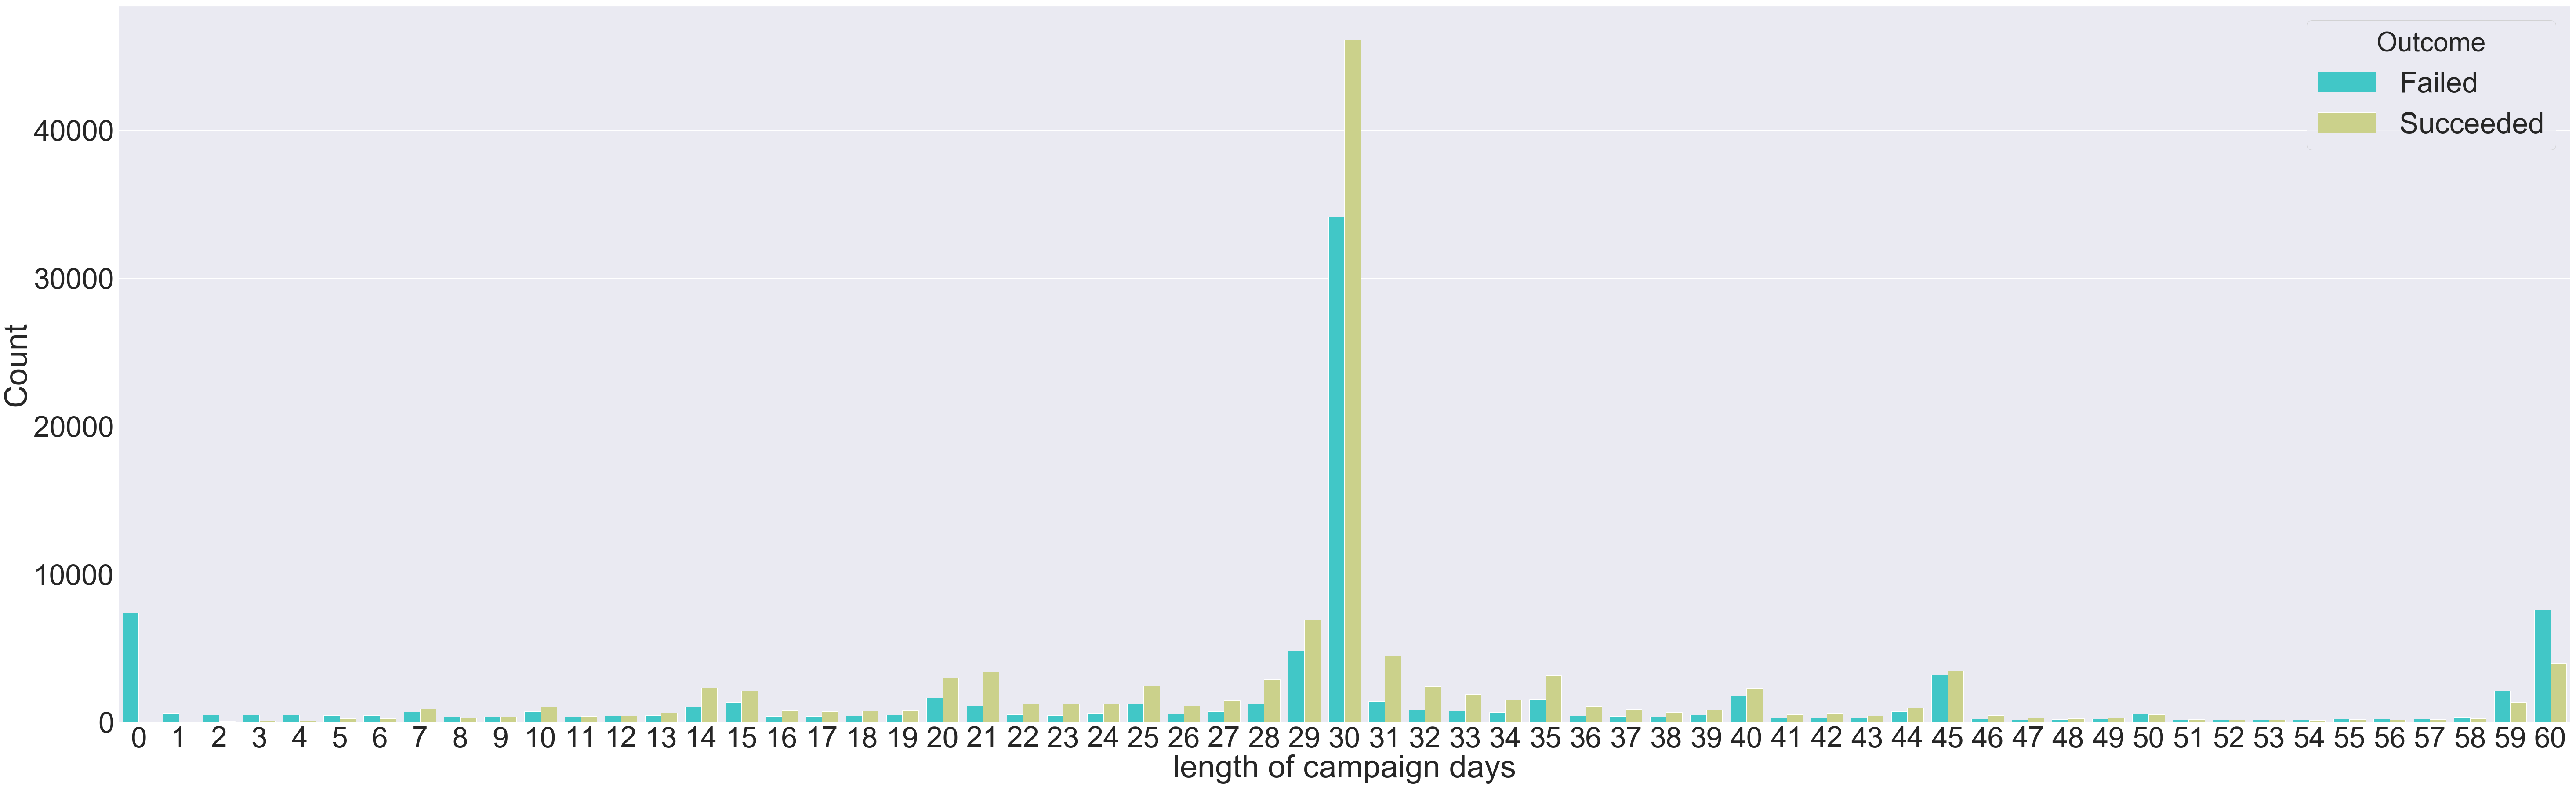

In [43]:
sns.set(font_scale=6) 
plt.figure(figsize=(100,30))
ax = sns.countplot(x = 'campaign_lenght_days', hue = 'state_successful', data= data_1[data_1['campaign_lenght_days'] < 61], palette = 'rainbow')
leg = ax.get_legend()
leg.set_title("Outcome")
labs = leg.texts
labs[0].set_text("Failed")
labs[1].set_text("Succeeded")

ax.set(xlabel='length of campaign days', ylabel='Count');
plt.savefig('eda.svg')
plt.savefig('eda.png')
plt.tight_layout

In [12]:
pickle.dump(data_1, open("kickstarter.pkl", "wb" ) )